In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,


In [2]:
df = pd.read_csv("air_quality_dataset.csv") 
print(df.info()) #check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     2164 non-null   int64  
 1   City     2164 non-null   object 
 2   Country  2164 non-null   object 
 3   2023     2164 non-null   float64
 4   Jan      2164 non-null   object 
 5   Feb      2164 non-null   object 
 6   Mar      2164 non-null   object 
 7   Apr      2164 non-null   object 
 8   May      2164 non-null   object 
 9   Jun      2164 non-null   object 
 10  Jul      2164 non-null   object 
 11  Aug      2164 non-null   object 
 12  Sep      2164 non-null   object 
 13  Oct      2164 non-null   object 
 14  Nov      2164 non-null   object 
 15  Dec      2164 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 270.6+ KB
None


Data types should be similar so we need to change to float

In [3]:
for col in df.columns[-12:]:
    df[col] = pd.to_numeric(df[col],errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     2164 non-null   int64  
 1   City     2164 non-null   object 
 2   Country  2164 non-null   object 
 3   2023     2164 non-null   float64
 4   Jan      2077 non-null   float64
 5   Feb      2098 non-null   float64
 6   Mar      2131 non-null   float64
 7   Apr      2155 non-null   float64
 8   May      2106 non-null   float64
 9   Jun      2158 non-null   float64
 10  Jul      2160 non-null   float64
 11  Aug      2153 non-null   float64
 12  Sep      2153 non-null   float64
 13  Oct      2133 non-null   float64
 14  Nov      2073 non-null   float64
 15  Dec      2113 non-null   float64
dtypes: float64(13), int64(1), object(2)
memory usage: 270.6+ KB


In [4]:
## check missing values by columns
df.isnull().sum(axis=0).sort_values(ascending=False)    

Nov        91
Jan        87
Feb        66
May        58
Dec        51
Mar        33
Oct        31
Aug        11
Sep        11
Apr         9
Jun         6
Jul         4
Rank        0
City        0
Country     0
2023        0
dtype: int64

In [5]:
np.sum(df.isnull().sum(axis=1) > 0)

np.int64(270)

In [6]:
print(df.isnull().sum().sum())

458


270 out of 2164 rows (12.48%) contain at least one missing value. And total amount is 458 missed value

In [7]:
df.iloc[:, -12:] = df.iloc[:, -12:].apply(lambda col: col.fillna(col.mean()), axis=0)#adding mean to missing valuse
sum(df.isnull().sum())#sum of missing values


0

In [8]:
df.head(20)

,Rank,City,Country,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Begusarai,India,118.9,31.2,235.3,156.8,113.0,109.3,99.0,63.800000,61.8,71.5,61.8,210.5,285.0
1,2,Guwahati,India,105.4,220.2,168.1,129.2,112.2,69.5,51.3,46.600000,60.2,76.7,76.4,126.9,128.0
2,3,Delhi,India,102.1,171.8,114.3,77.4,71.0,67.4,42.9,35.300000,34.8,39.7,106.3,255.1,210.0
3,4,Mullanpur,India,100.4,106.3,123.7,78.1,56.6,53.4,53.9,63.200000,59.7,59.6,110.4,253.0,201.4
4,5,Lahore,Pakistan,99.5,143.2,117.3,73.8,52.9,52.4,46.4,39.800000,42.2,53.8,125.9,251.0,197.5
5,6,New Delhi,India,92.7,162.6,98.2,67.1,59.0,57.7,40.1,31.700000,35.0,38.0,94.7,234.7,193.8
6,7,Siwan,India,90.6,223.6,167.5,108.3,71.7,59.8,48.9,35.700000,30.4,54.7,48.9,136.3,77.6
7,8,Saharsa,India,89.4,202.0,147.1,108.8,88.8,60.3,43.6,16.700000,24.3,33.6,41.8,115.8,167.8
8,9,Goshaingaon,India,89.3,205.3,117.5,63.8,63.3,60.7,39.2,27.300000,38.3,33.9,81.1,152.0,156.1
9,10,Katihar,India,88.8,224.1,113.3,94.0,74.1,49.9,34.7,17.700000,27.6,33.9,63.9,134.1,180.5


In [9]:
df.duplicated().sum()
#checking for duplicates
df.describe()


,Rank,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,1082.500000,23.196811,34.433462,30.304147,29.213468,27.340510,19.556363,15.804727,14.068426,14.732699,15.476777,21.324051,27.730005,30.366872
std,624.837312,16.075976,33.013824,24.732518,22.827612,22.294342,11.800626,9.490754,8.553461,10.188459,11.128637,17.482558,30.138818,29.061788
min,1.000000,1.500000,0.900000,0.800000,1.400000,1.400000,1.500000,1.500000,1.200000,1.500000,1.100000,1.000000,0.000000,1.000000
25%,541.750000,10.100000,10.300000,9.900000,12.175000,12.700000,10.200000,9.700000,9.100000,7.500000,7.700000,8.400000,10.300000,9.800000
50%,1082.500000,19.100000,25.200000,24.500000,23.200000,20.400000,17.850000,12.700000,11.500000,11.900000,11.900000,16.100000,18.700000,21.300000
75%,1623.250000,31.200000,44.500000,42.500000,39.450000,35.225000,24.900000,19.400000,16.700000,18.700000,20.100000,27.800000,32.100000,40.325000
max,2164.000000,118.900000,225.300000,235.300000,252.500000,232.000000,109.300000,99.000000,88.900000,99.600000,155.400000,156.000000,255.100000,285.000000


In [10]:
num_col = df.select_dtypes(exclude='object')
cat_col = df.select_dtypes(include='object')
cat_col["2023"] = df["2023"]
print(num_col.shape)
print(cat_col.shape)

(2164, 14)
(2164, 3)


In [11]:
num_col.describe().loc[["min","max"],:]#checking minimal and maximum values



,Rank,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
min,1.0,1.5,0.9,0.8,1.4,1.4,1.5,1.5,1.2,1.5,1.1,1.0,0.0,1.0
max,2164.0,118.9,225.3,235.3,252.5,232.0,109.3,99.0,88.9,99.6,155.4,156.0,255.1,285.0


In [12]:
df[df[['City','Country']].duplicated(keep=False)].sort_values("City")#check for duplicates


,Rank,City,Country,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1143,1144,Ashdod,Israel,18.1,19.7,16.1,16.6,17.4,29.7,25.9,21.7,15.4,16.300000,16.5,16.4,17.4
1255,1256,Ashdod,Israel,16.1,16.4,13.3,15.0,14.4,19.1,15.1,15.7,14.4,16.000000,16.1,18.4,19.1
753,754,Ban Mai,Thailand,25.6,17.4,39.5,48.0,46.9,18.3,11.0,8.9,13.8,15.476777,24.7,21.7,22.5
1155,1156,Ban Mai,Thailand,18.0,28.9,28.6,37.5,35.6,16.4,5.4,4.0,5.2,4.800000,13.7,14.8,21.4
830,831,Ban Pong,Thailand,23.7,18.6,40.1,74.5,75.8,16.6,4.6,2.6,4.2,3.200000,4.6,9.9,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,1935,Yamagata,Japan,8.5,6.8,7.6,12.2,11.3,9.9,8.3,10.2,8.9,7.600000,6.4,7.2,5.2
597,598,Yichun,China,29.4,48.8,34.3,34.1,25.0,25.7,20.7,16.0,21.9,22.900000,32.5,31.4,40.2
848,849,Yichun,China,23.2,45.9,40.4,31.0,24.2,14.6,9.4,9.8,8.1,9.600000,16.1,28.1,40.9
722,723,Yulin,China,26.4,39.9,35.1,36.8,29.0,23.5,17.4,17.0,14.1,15.300000,21.8,34.6,32.4


We have more than 104 rows that contains duplicate cities of same country. So we need to get rid of duplicates

In [13]:
df.drop_duplicates(subset=['City','Country'],keep='first',inplace=True)




In [14]:
df[df['City'].duplicated(keep=False)].sort_values(by='City',ascending=True)
#check for same city different country


,Rank,City,Country,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
125,126,Anyang,China,50.6,90.4,83.8,63.8,52.1,30.5,21.7,22.0,25.0,28.6,50.6,61.4,77.7
1006,1007,Anyang,South Korea,20.3,25.9,32.8,32.2,20.9,19.5,18.0,15.1,12.6,12.8,17.8,18.5,19.5
1378,1379,Golog,China,13.4,19.0,17.5,17.1,16.9,12.5,11.0,10.3,10.0,10.3,11.4,12.3,13.1
1417,1418,Golog,"China, China",12.6,19.7,19.9,14.8,12.1,10.1,9.9,8.8,8.5,9.5,9.5,11.6,12.9
593,594,Kochi,India,29.5,35.0,31.4,43.3,33.5,35.7,31.1,29.6,28.4,19.4,24.0,25.5,13.7
1591,1592,Kochi,Japan,10.4,9.6,7.4,11.0,13.7,10.8,13.0,11.9,8.5,9.6,10.4,10.3,8.6
1264,1265,Shima,China,15.8,21.0,26.2,27.4,20.6,16.0,8.9,3.4,5.1,7.9,13.6,19.1,21.3
2123,2124,Shima,Japan,6.9,5.6,5.3,7.2,10.0,7.2,8.2,7.6,5.9,6.0,6.3,7.3,6.4
1075,1076,Zhuhai,Macao SAR,19.2,24.9,23.3,23.1,25.9,23.0,8.9,9.8,11.0,10.7,19.6,22.9,28.1
1172,1173,Zhuhai,China,17.7,25.1,21.0,21.9,19.5,18.0,8.5,7.9,9.3,9.6,18.2,23.1,28.9


In [15]:
df.drop(1417,axis=0,inplace=True)#drop China, China


In [16]:
print(df.shape)
print(df.columns)
print(df.dtypes)


(2110, 16)
Index(['Rank', 'City', 'Country', '2023', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')
Rank         int64
City        object
Country     object
2023       float64
Jan        float64
Feb        float64
Mar        float64
Apr        float64
May        float64
Jun        float64
Jul        float64
Aug        float64
Sep        float64
Oct        float64
Nov        float64
Dec        float64
dtype: object


In [17]:
print(df.isnull().sum())  # Missing values by column
print(df.isnull().sum().sum())  # Total missing values

Rank       0
City       0
Country    0
2023       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
dtype: int64
0


In [18]:
df.to_csv('cleaned_data.csv', index=False)
df = pd.read_csv("cleaned_data.csv") 




# Data Cleaning and Initial Exploration Summary

## Dataset Description:

The dataset contains information on PM2.5 air pollution levels for 2164 cities across Asia in 2023. It includes columns for the city's rank based on annual PM2.5 average, city and country names, the overall 2023 average, and monthly PM2.5 values from January to December.

## Data Cleaning Steps:

The dataset was loaded using pandas.read_csv(). Monthly columns were checked and converted to numeric types using pd.to_numeric(errors='coerce') to ensure consistency and handle any non-numeric values.

Missing values were primarily found in the monthly columns. These rows were dropped before performing modeling using df.dropna(subset=monthly_columns). The dataset was also checked for duplicate entries, and city names were normalized for case consistency (e.g., 'Almaty' vs 'almaty').

## Initial Exploration:

The dataset contains 2164 rows and 17 columns, covering over 40 countries in Asia. Descriptive statistics were generated using .describe() to understand the distribution of PM2.5 values. Results showed high variability, with some cities exceeding 100 µg/m³.

City-level analysis was performed for selected locations, such as Almaty, to explore monthly trends. Seasonal changes in pollution levels were evident in many cities.

## Observations:

The dataset is largely clean, with some missing data in monthly values. Seasonal variation is significant, with higher pollution during winter months. The distribution of annual PM2.5 levels is right-skewed, with a few cities experiencing extremely high pollution.

# Part 2: EDA Visualizations


        Jan    Feb    Mar    Apr    May   Jun   Jul   Aug   Sep    Oct    Nov  \
0      31.2  235.3  156.8  113.0  109.3  99.0  63.8  61.8  71.5   61.8  210.5   
1     220.2  168.1  129.2  112.2   69.5  51.3  46.6  60.2  76.7   76.4  126.9   
2     171.8  114.3   77.4   71.0   67.4  42.9  35.3  34.8  39.7  106.3  255.1   
3     106.3  123.7   78.1   56.6   53.4  53.9  63.2  59.7  59.6  110.4  253.0   
4     143.2  117.3   73.8   52.9   52.4  46.4  39.8  42.2  53.8  125.9  251.0   
...     ...    ...    ...    ...    ...   ...   ...   ...   ...    ...    ...   
2105    3.8    3.1    3.8    5.1    7.1   4.0   3.1   3.0   3.0    4.3    6.8   
2106    5.2    4.5    3.3    3.3    3.3   3.6   3.8   4.9   4.1    3.6    3.1   
2107    3.4    4.0    3.2    2.4    2.7   2.5   5.1   4.4   3.8    2.6    2.3   
2108    0.9    0.8    1.4    1.4    1.8   2.1   2.3   2.6   2.4    3.0    8.2   
2109    1.4    1.5    1.4    1.4    1.5   1.5   1.5   1.5   1.5    1.5    1.5   

        Dec  
0     285.0  

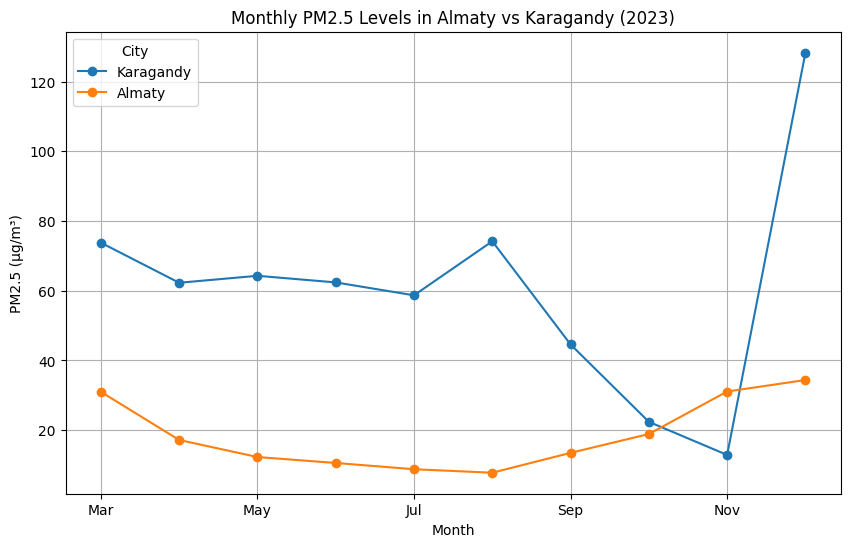

In [ ]:
# filter rows for Almaty and Karagandy
cities_df = df[df['City'].str.lower().isin(['almaty', 'karagandy'])].set_index('City')


# Use iloc to get only the month columns from 4 to 16
monthly_data = cities_df.iloc[:, 4:16].T
#print(monthly_data)

# Plot
monthly_data.plot(marker='o', figsize=(10, 6), title="Monthly PM2.5 Levels in Almaty vs Karagandy (2023)")
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()

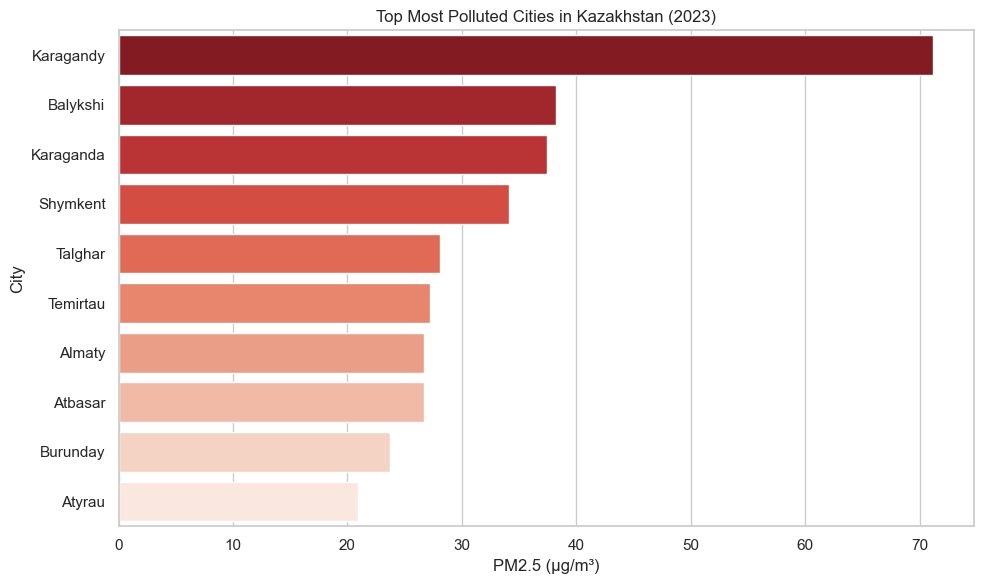

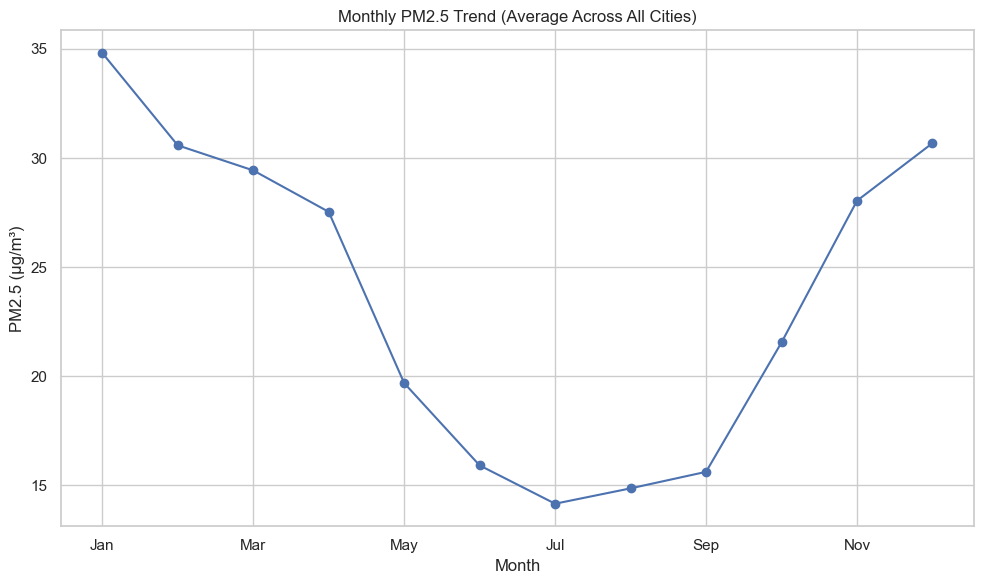

In [124]:
# Top 10 most polluted cities
top10 = df.nlargest(10, '2023')[['City', 'Country', '2023']]

# Monthly PM2.5 average across all cities
monthly_avg = df.iloc[:, 4:16].mean()

# Filter Kazakhstan cities
kz_df = df[df['Country'].str.lower() == 'kazakhstan']

# Top most polluted Kazakhstan cities
top_kz = kz_df.nlargest(10, '2023')[['City', '2023']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_kz, x='2023', y='City', hue='City', palette='Reds_r', legend=False)
plt.title("Top Most Polluted Cities in Kazakhstan (2023)")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

# Plot monthly average trend line
plt.figure(figsize=(10, 6))
monthly_avg.plot(marker='o')
plt.title("Monthly PM2.5 Trend (Average Across All Cities)")
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

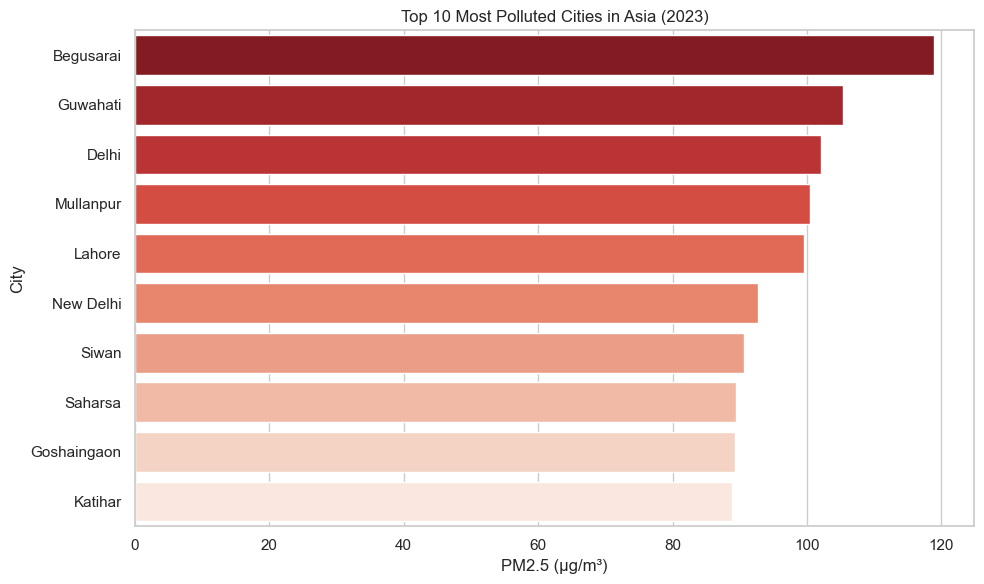

In [125]:
# Plot Top 10 bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='2023', y='City', hue='City', palette='Reds_r', legend=False)
plt.title("Top 10 Most Polluted Cities in Asia (2023)")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [ ]:
#%pip install nbformat==4.2.0 


In [24]:
# Group and aggregate
map_df = df[["Country", "2023"]].groupby("Country").mean().reset_index()
fig = px.choropleth(data_frame=map_df,
                    locations='Country',
                    locationmode='country names',
                    color='2023',
                    scope='asia',
                    projection='equirectangular',
                    color_continuous_scale='Reds',
                    title='Average Pollution Index (2023) by Country')
pio.show(fig)

# EDA Visualization summary


## Data Cleaning and Preparation

The dataset containing PM2.5 pollution data for 2164 cities across Asia was loaded and examined. The monthly pollution columns (January to December) were stored in columns 4 to 15 and converted to numeric format to ensure consistency and enable analysis. Rows with missing or invalid numeric values were automatically handled using pd.to_numeric with coercion to NaN. This step was essential to prepare the dataset for accurate aggregation and visualization.

## Identifying the Most Polluted Cities

Using the cleaned data, we identified the top 10 most polluted cities in Asia based on their 2023 average PM2.5 levels. These cities were visualized using a horizontal bar plot, clearly showing which urban areas experienced the highest pollution. Additionally, a separate ranking was created specifically for Kazakhstan to highlight the most polluted cities within the country. This allowed us to localize the analysis and provide region-specific insights.

## Monthly Trends in Air Pollution

To understand seasonal patterns, we computed the average PM2.5 level across all cities for each month. This monthly trend line revealed a clear seasonal effect, with PM2.5 concentrations peaking during winter months (especially January) and dipping in summer, likely due to factors such as heating emissions, low atmospheric dispersion, and meteorological conditions.

## Heatmap Visualization of Monthly Pollution

A heatmap was generated to display monthly PM2.5 levels for the Asia countries. This allowed for a detailed comparison of pollution levels not just annually, but across multiple cities. The visualization highlighted cities with consistently high pollution as well as those that experienced seasonal spikes. Based of this map we can see that India struggles the most with air quality problem and Kazakhstan is in normal state.



# Part 3: Prediction based on monthly pollution levels (Jan–Dec).



In [103]:
# Define features (monthly columns) and target
X = df.iloc[:, 4:16]  # Jan–Dec
y = df['2023']

### Split the data for test and train

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Working with different models


In [105]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [106]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

Results of Linear Regression and Random Forest models

In [111]:
def evaluate(true, preds, model_name):
    print(f"{model_name} Results:")
    print("MAE:", mean_absolute_error(true, preds))
    print("RMSE:", np.sqrt(mean_squared_error(true, preds)))
    print("R² Score:", r2_score(true, preds))
    print()

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, rf_preds, "Random Forest")

Linear Regression Results:
MAE: 0.625702445206461
RMSE: 1.2075254953581946
R² Score: 0.9939927807803642

Random Forest Results:
MAE: 0.9753246445497628
RMSE: 1.8325873009599865
R² Score: 0.9861640109970561



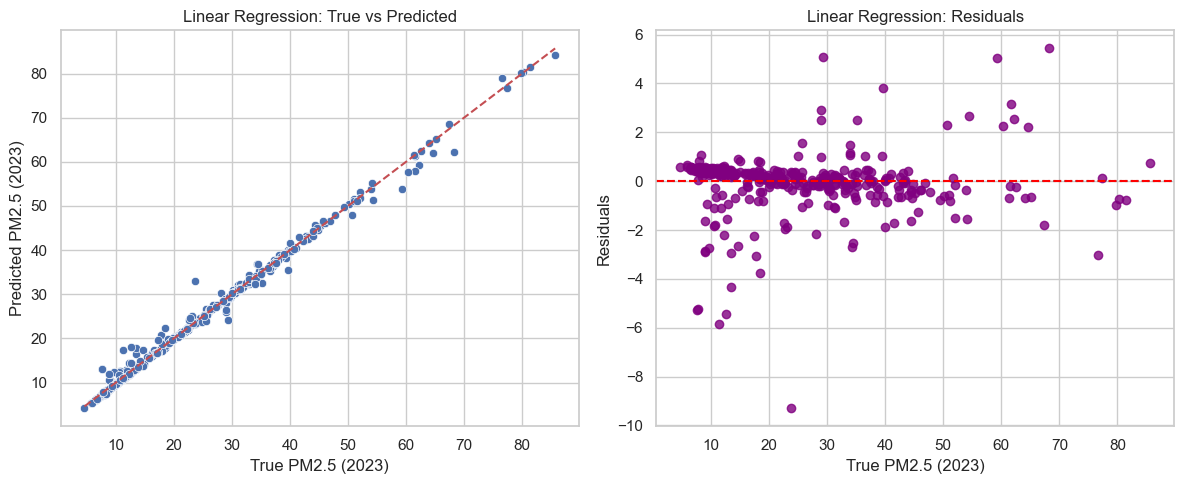

In [121]:
# Set up the figure
plt.figure(figsize=(12, 5))

# Plot 1: True vs. Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True PM2.5 (2023)')
plt.ylabel('Predicted PM2.5 (2023)')
plt.title('Linear Regression: True vs Predicted')

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - lr_preds
sns.residplot(x=y_test, y=residuals, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('True PM2.5 (2023)')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')

plt.tight_layout()
plt.show()

Try other models so we can which one have best accuracy on our dataset

In [115]:

# Define models
models = {
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

print(pd.DataFrame(results).T)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3059
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 12
[LightGBM] [Info] Start training from score 23.413507
               MAE      RMSE        R2
LightGBM  1.005058  1.802611  0.986613
CatBoost  0.663969  1.312769  0.992900
XGBoost   1.072012  1.912404  0.984933


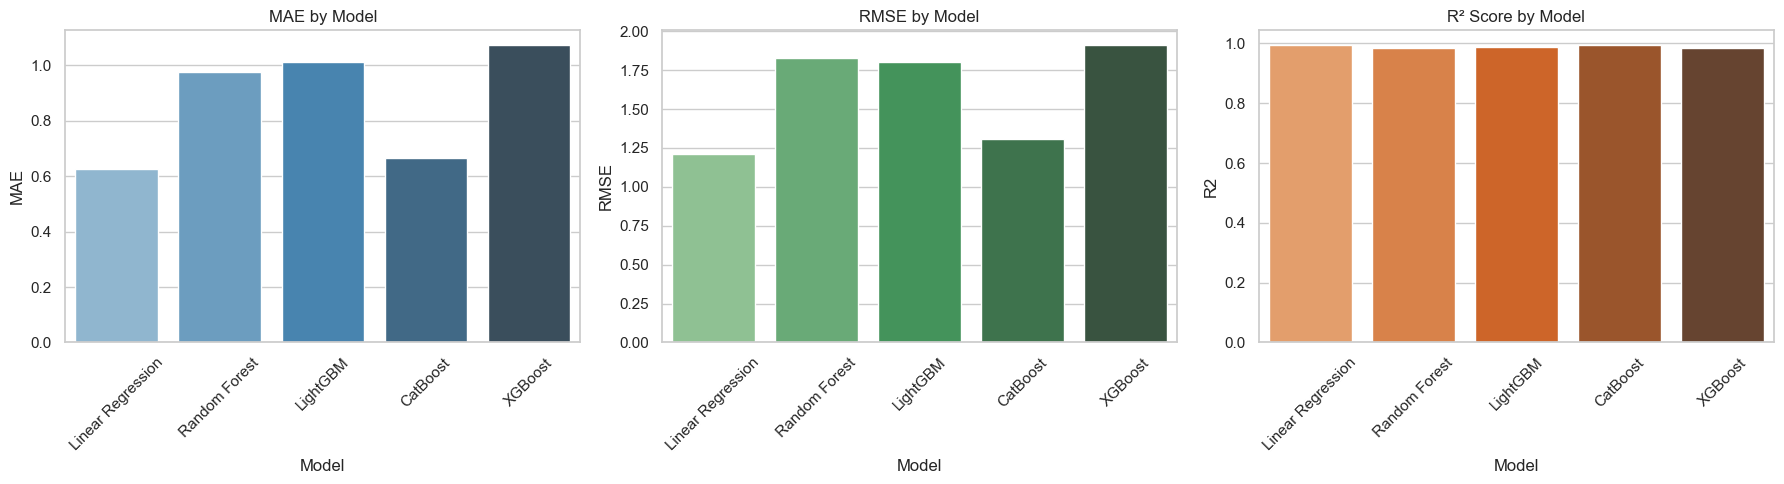

In [ ]:
# Create a DataFrame with results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LightGBM', 'CatBoost', 'XGBoost'],
    'MAE': [0.626, 0.975, 1.01, 0.664, 1.072],
    'RMSE': [1.21, 1.83, 1.80, 1.31, 1.91],
    'R2': [0.994, 0.986, 0.987, 0.993, 0.985]
})

# Plotting
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
sns.barplot(x='Model', y='MAE', hue='Model', data=results_df, ax=axes[0], palette='Blues_d', legend=False)
axes[0].set_title('MAE by Model')
axes[0].tick_params(axis='x', rotation=45)

# RMSE
sns.barplot(x='Model', y='RMSE', hue='Model', data=results_df, ax=axes[1], palette='Greens_d', legend=False)
axes[1].set_title('RMSE by Model')
axes[1].tick_params(axis='x', rotation=45)

# R²
sns.barplot(x='Model', y='R2', hue='Model', data=results_df, ax=axes[2], palette='Oranges_d', legend=False)
axes[2].set_title('R² Score by Model')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Review of models and overall prediction:

Linear Regression model is performing exceptionally well on this dataset. It means:

Monthly PM2.5 values are highly predictive of the annual average.

The dataset is clean and consistent, with minimal noise.

No obvious overfitting on the test set.

Best model: Linear Regression — due to its lowest errors and highest R².

Runner-up: CatBoost — excellent performance, especially if the data becomes more complex.

Other models (LightGBM, XGBoost, RF): Still very good, but not better than the linear baseline here.

This shows that sometimes simpler models outperform more complex ones, especially when the data has a strong linear structure — which seems to be the case with monthly vs. annual PM2.5 levels.